In [15]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  # knn 분류 모델
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [2]:
# 데이터를 불러와서 data 변수에 담기
data = pd.read_csv('./archive/games.csv')
# data.head()
# 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [3]:
# 결측치 처리
data['PTS_home'].isnull().sum()

99

In [4]:
data[data['PTS_home'].isnull()][['PTS_home','FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home']].isna().sum()

PTS_home        99
FG_PCT_home     99
FT_PCT_home     99
FG3_PCT_home    99
AST_home        99
REB_home        99
dtype: int64

In [5]:
data1 = data.dropna() # dropna(how = 'all') >> 모두 all이어야 날린다 , dropna(how = 'any') >> 하나라도 none 이면 날린다
data1.isnull().sum()#data1.isnull().value_counts()???

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [6]:
# 문제와 답 (열 분리)
# 훈련셋과 테스트셋 분리 (행 분리)
test_data = data1[['FG_PCT_home','FG_PCT_away','HOME_TEAM_WINS']]
test_data

,FG_PCT_home,FG_PCT_away,HOME_TEAM_WINS
0,0.484,0.478,1
1,0.488,0.561,1
2,0.482,0.470,1
3,0.441,0.392,1
4,0.429,0.500,0
...,...,...,...
26646,0.419,0.366,1
26647,0.338,0.411,0
26648,0.448,0.387,1
26649,0.440,0.469,1


In [55]:
X = test_data.iloc[:,:1]
y = test_data.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19914, 1)
(6638, 1)
(19914,)
(6638,)


In [57]:
# 모델 객체 생성 (+ 하이퍼 파라미터 설정)
knn_model = KNeighborsClassifier(n_neighbors=5)
# 모델 학습
# fit(훈련용 문제, 훈련용 답)
knn_model.fit(X_train,y_train)
# 모델 예측
# 테스트 데이터 활용하기
pre = knn_model.predict(X_test) # 예측값 예측을 영어로 prediction
pre

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
# 정확도 점수 확인
accuracy_score(y_test, pre)

0.6416089183489003

In [63]:
# 최적의 하이퍼 파라미터 찾기
# lst = []
# for i in range(1,1000):
#     knn_model = KNeighborsClassifier(n_neighbors=i)
#     knn_model.fit(X_train,y_train)
#     pre = knn_model.predict(X_test)
#     lst.append(accuracy_score(y_test, pre))
# lst
K_lst = []
for k in range(1,201):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result = cross_val_score(knn_model, X_train, y_train, cv=5)
    print(f'{k}:', knn_result, knn_result.mean())
    K_lst.append(knn_result.mean())
print(f"가장 좋은 n_neighbors {K_lst.index(max(K_lst))+1}")

1: [0.60381622 0.61511424 0.61009289 0.63268893 0.63510799] 0.6193640526229445
2: [0.591765   0.5932714  0.57419031 0.59352247 0.60145655] 0.590841147705473
3: [0.65503389 0.66080844 0.6359528  0.67110218 0.65394274] 0.6553680111846518
4: [0.62867186 0.64649761 0.61285463 0.64022094 0.61275741] 0.6282004899527159
5: [0.66357017 0.66331911 0.64624655 0.66758725 0.65293822] 0.6587322590119006
6: [0.6610595  0.6587999  0.64448908 0.66758725 0.65143144] 0.6566734336651512
7: [0.66582978 0.67562139 0.66281697 0.6839066  0.6677549 ] 0.6711859279385909
8: [0.67135325 0.66984685 0.66432337 0.66909365 0.65670517] 0.6662644592103077
9: [0.67988953 0.67361285 0.66231484 0.67361285 0.66072325] 0.6700306664953375
10: [0.68039166 0.67260859 0.66306804 0.67712779 0.65796082] 0.6702313814121871
11: [0.67612352 0.67511926 0.67311072 0.67963846 0.67604219] 0.6760068311418455
12: [0.67662566 0.67562139 0.66909365 0.68365554 0.67101959] 0.6752031644282274
13: [0.68039166 0.67587246 0.66934472 0.68290233 0

In [64]:
# max(lst)
# # lst.index(max(lst))+1
# # 다수의 최댓값 처리
# [index for index, value in enumerate(lst) if value == max(lst)]

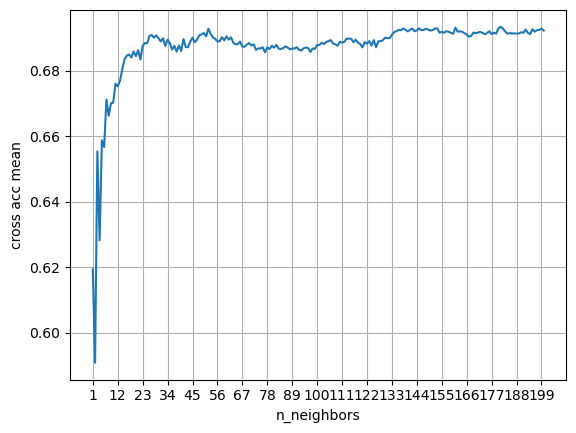

In [65]:
# 시각화
# 추이 - 선그래프
plt.plot(range(1,201), K_lst)
plt.xlabel('n_neighbors')
plt.xticks(range(1,201,11))
plt.ylabel('cross acc mean')
plt.grid()
# plt.xlim(600,800)
# plt.ylim(0.687,0.692)
plt.show()

#### 최적의 하이퍼 파라미터 조합을 찾아보자!
 - GridSearchCV
 - 1. 모델에 연결할 파라미터의 조합을 정의
   2. 임의로 연결할 모델 생성
   3. 그리드서치 내부 파라미터 값들을 연결 - 그리드 객체 생성
   4. 그리드서치 객체에 데이터를 연결하여 실행

In [ ]:
# params = {'n_neighbors':range(1,1000)}
# knn = KNeighborsClassifier()
# grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)

In [ ]:
# 결측치 처리된 데이터 저장
csv_file = './archive/example.csv'
data1.to_csv(csv_file, index=False, encoding='utf-8')